# Neural Networks (cont.)

## Learning with Gradient Descent

- What we'd like is an algorithm which lets us find weights and biases so that the output from the network approximates _y(x)_ for all training inputs _x_
- To quantify how well we're achieving this goal we define a cost function:

$C(w, b) = \frac{1}{2n}\sum_x ||y(x) - a||^2$

- Here, _w_ denotes the collection of all weights in the network, _b_ all the biases, n is the total number of training inputs, _a_ is the vector of outputs from the network when _x_ is input, and the sum is over all training inputs, _x_
- Quadratic loss function, also known as mean squared error or MSE
- Strictly non-negative
- Small when _y(x)_ is approximately equal to output _a_ for all training inputs _x_
- Minimize cost $C(w, b)$ as function of weights and biases $\rightarrow$ gradient descent

## Quadratic Cost

- Aren't we primarily interested in the number of images correctly classified by the network?
- The problem with that is that the number of images correctly classified is not a smooth function of the weights and biases in the network
- For the most part, making small changes to the weights and biases won't cause any change at all in the number of training images classified correctly
- That makes it difficult to figure out how to change the weights and biases to get improved performance
- If we instead use a smooth cost function like the quadratic cost it turns out to be easy to figure out how to make small changes in the weights and biases so as to get an improvement in the cost
- That's why we focus first on minimizing the quadratic cost, and only after that will we examine the classification accuracy.

## Gradient Descent

- Let's suppose we're trying to minimize some function, $C(v)$
- This could be any real-valued function of many variables, $\textbf{v} = v_1, v_2,...$
- Note that I've replaced the _w_ and _b_ notation by _v_ to emphasize that this could be any function — we're not specifically thinking in the neural networks context any more
- To minimize $C(v)$ it helps to imagine _C_ as a function of just two variables, which we'll call $v_1$ and $v_2$
- We'd like to find where _C_ achieves its global minimum


- A general function, _C_, may be a complicated function of many variables, and it won't usually be possible to just eyeball the graph to find the minimum
- Using calculus to analytically solve the minimum will not work with several (often billions of) variables
- Randomly choose a starting point for an (imaginary) ball, and then simulate the motion of the ball as it rolled down to the bottom of the valley
- We could do this simulation simply by computing derivatives (and perhaps some second derivatives) of C | those derivatives would tell us everything we need to know about the local shape of the valley, and therefore how our ball should roll


- To make this question more precise, let's think about what happens when we move the ball a small amount $\Delta v_1$ in the $v_1$ direction, and a small amount $\Delta v_2$ in the $v_2$ direction
- Calculus tells us that _C_ changes as follows

$\Delta{C} \approx \frac{\partial{C}}{\partial{v_1}}\Delta{v_1} + \frac{\partial{C}}{\partial{v_2}}\Delta{v_2}$

- We're going to find a way of choosing $\Delta{v_1}$ and $\Delta{v_2}$ so as to make $\Delta{C}$ negative; i.e., we'll choose them so the ball is rolling down into the valley

## Mathematical Notation

$\nabla{C} \equiv \left(\frac{\partial{C}}{\partial{v_1}}, \frac{\partial{C}}{\partial{v_2}}\right)^T$

$\Delta{C} \approx \nabla{C}.\Delta{v}$

$\Delta{v} = -\eta\nabla{C}, \eta>0$

$\Delta{C} \approx -\eta\nabla{C}.\nabla{C} = -\eta||\nabla{C}||^2$

$\text{v} \rightarrow \text{v}^\prime = v - \eta\nabla{C}$

## Learning Rate

- To make gradient descent work correctly, we need to choose the learning rate $\eta$ to be small enough that the above equation is a good approximation
- If we don't, we might end up with $\Delta{C} > 0$
- At the same time, we don't want $\eta$ to be too small, since that will make the changes $\Delta{v}$ tiny, and thus the gradient descent algorithm will work very slowly
- In practical implementations, $\eta$ is often varied so that the equation remains a good approximation, but the algorithm isn't too slow
- We'll see later how this works

## Stochastic Gradient Descent

- There are a number of challenges in applying gradient descent, but for our purposes understanding one is critical
- The cost function is an average over costs for individual training examples
- In practice, to compute the gradient $\Delta{C}$ we need to compute the gradients $\Delta{C_x}$ separately for each training input, _x_, and then average them
- When number of training points is very large this can take a long time
- Stochastic gradient descent: estimate the gradient by computing it for a small sample of randomly chosen training inputs
- Averaging over small sample produces a good estimate of the true gradient and speeds up learning
- Of course, the estimate won't be perfect — there will be statistical fluctuations — but it doesn't need to be perfect: all we really care about is moving in a general direction that will help decrease _C_, and that means we don't need an exact computation of the gradient

# 11NN/NN2.py

In [1]:
import random
import numpy as np

In [2]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

In [3]:
#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [4]:
"""
mnist_loader
~~~~~~~~~~~~

A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

import pickle as cPickle
import gzip


def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.

    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.

    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.

    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.

    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    with gzip.open('mnist.pkl.gz','rb') as ff :
        u = cPickle._Unpickler( ff )
        u.encoding = 'latin1'
        train, val, test = u.load()
    return (train, val, test)

def load_data_wrapper():
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.

    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.

    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.

    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

In [5]:
import os
os.chdir('../KocPythonFall2021/inclass/11NN')

In [6]:
training_data, validation_data, test_data = load_data_wrapper()    

training_data, validation_data, test_data = list(training_data), list(validation_data), list(test_data)

net = Network([784, 30, 10])

net.SGD(training_data, 30, 10, 3.0, test_data=test_data)

Epoch 0: 9074 / 10000
Epoch 1: 9229 / 10000
Epoch 2: 9313 / 10000
Epoch 3: 9344 / 10000
Epoch 4: 9355 / 10000
Epoch 5: 9375 / 10000
Epoch 6: 9338 / 10000
Epoch 7: 9411 / 10000
Epoch 8: 9468 / 10000
Epoch 9: 9429 / 10000
Epoch 10: 9426 / 10000
Epoch 11: 9456 / 10000
Epoch 12: 9476 / 10000
Epoch 13: 9477 / 10000
Epoch 14: 9459 / 10000
Epoch 15: 9483 / 10000
Epoch 16: 9468 / 10000
Epoch 17: 9496 / 10000
Epoch 18: 9489 / 10000
Epoch 19: 9482 / 10000
Epoch 20: 9519 / 10000
Epoch 21: 9493 / 10000
Epoch 22: 9517 / 10000
Epoch 23: 9490 / 10000
Epoch 24: 9499 / 10000
Epoch 25: 9506 / 10000
Epoch 26: 9515 / 10000
Epoch 27: 9490 / 10000
Epoch 28: 9509 / 10000
Epoch 29: 9523 / 10000


#### TODO: change the number of layers, the number of neurons per layer, the SGD parameters, etc.

In [7]:
import pandas as pd

In [8]:
# Location of dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=names)

irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Assign data from first four columns to X variable
X = irisdata.iloc[:, 0:4]

# Assign data from first fifth columns to y variable
y = irisdata.select_dtypes(include=[object]) 

y.head()

,Class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [10]:
y.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
from sklearn import preprocessing  
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train.values.ravel())

predictions = mlp.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 0 10  3]
 [ 0  1  6]]


In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.77      0.83        13
           2       0.67      0.86      0.75         7

    accuracy                           0.87        30
   macro avg       0.86      0.88      0.86        30
weighted avg       0.88      0.87      0.87        30



#### TODO: try to change the parameters to get a better score

In [17]:
import os
import pandas as pd

In [18]:
wine = pd.read_csv('wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

wine.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [20]:
wine.shape

(178, 14)

In [21]:
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)

mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))

[[18  0  0]
 [ 0 12  0]
 [ 0  1 14]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.92      1.00      0.96        12
           3       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



- **coefs_** is a list of weight matrices, where weight matrix at index i represents the weights between layer i and layer i+1.
- **intercepts_** is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [27]:
len(mlp.coefs_)

4

In [28]:
len(mlp.coefs_[0])

13

In [29]:
len(mlp.intercepts_[0])

13

In [30]:
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina' 
plt.style.use('bmh')

In [31]:
def make_data():
    N = 2000
    X = 0.5*np.random.normal(size=N)+0.35

    Xt = 0.75*X-0.35
    X = X.reshape((N,1))

    Y = -(8 * Xt**2 + 0.1*Xt + 0.1) + 0.05 * np.random.normal(size=N)
    Y = np.exp(Y) + 0.05 * np.random.normal(size=N)
    Y /= max(np.abs(Y))
    return X, Y

In [32]:
np.random.seed(0)
X, Y = make_data()

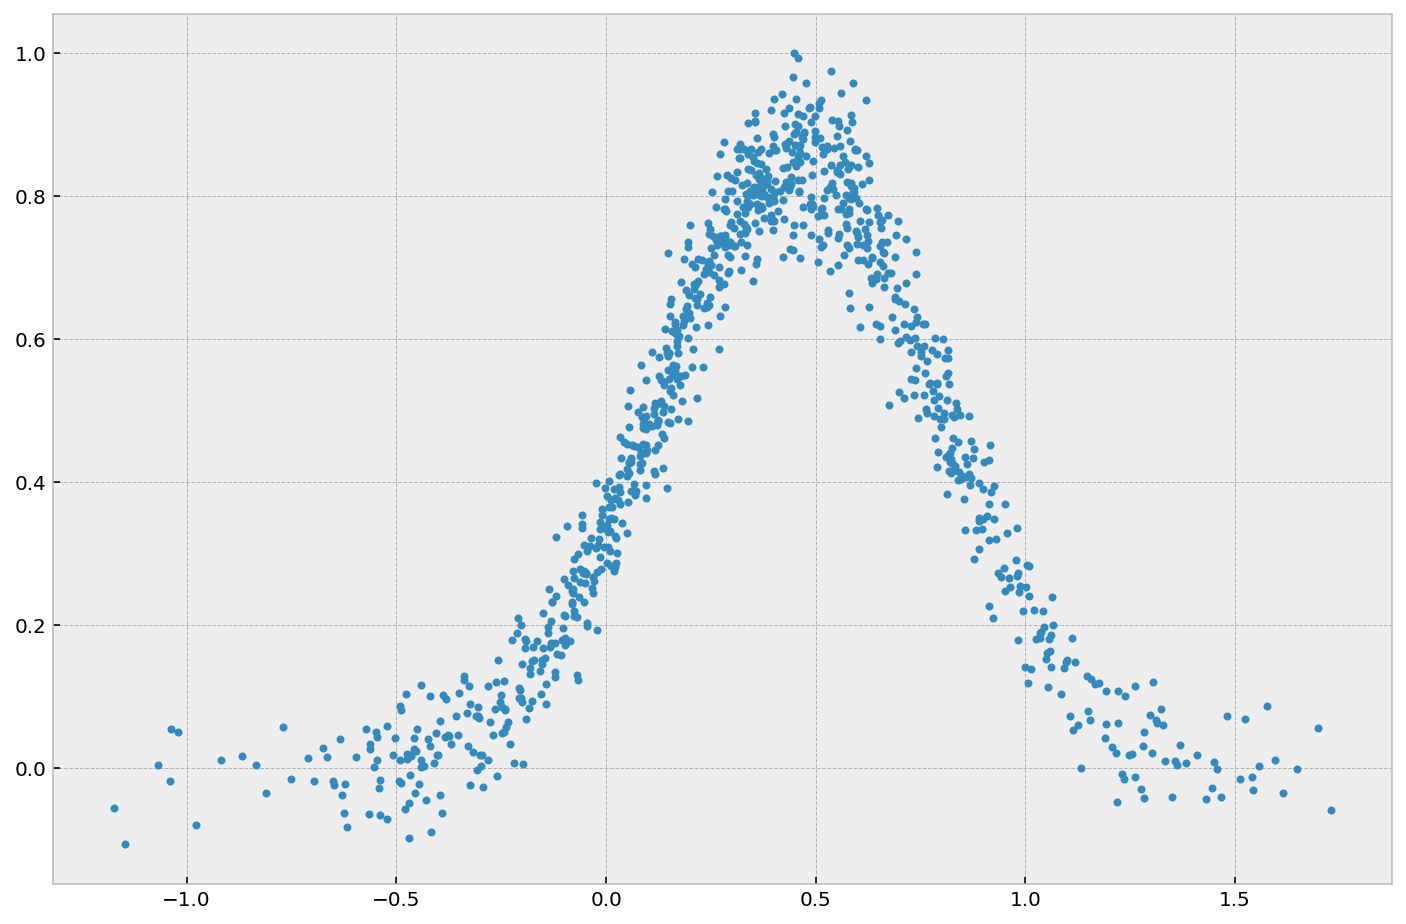

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.5, random_state=0)

plt.figure(figsize=(12, 8))
plt.plot(Xtest[:,0], Ytest, '.');

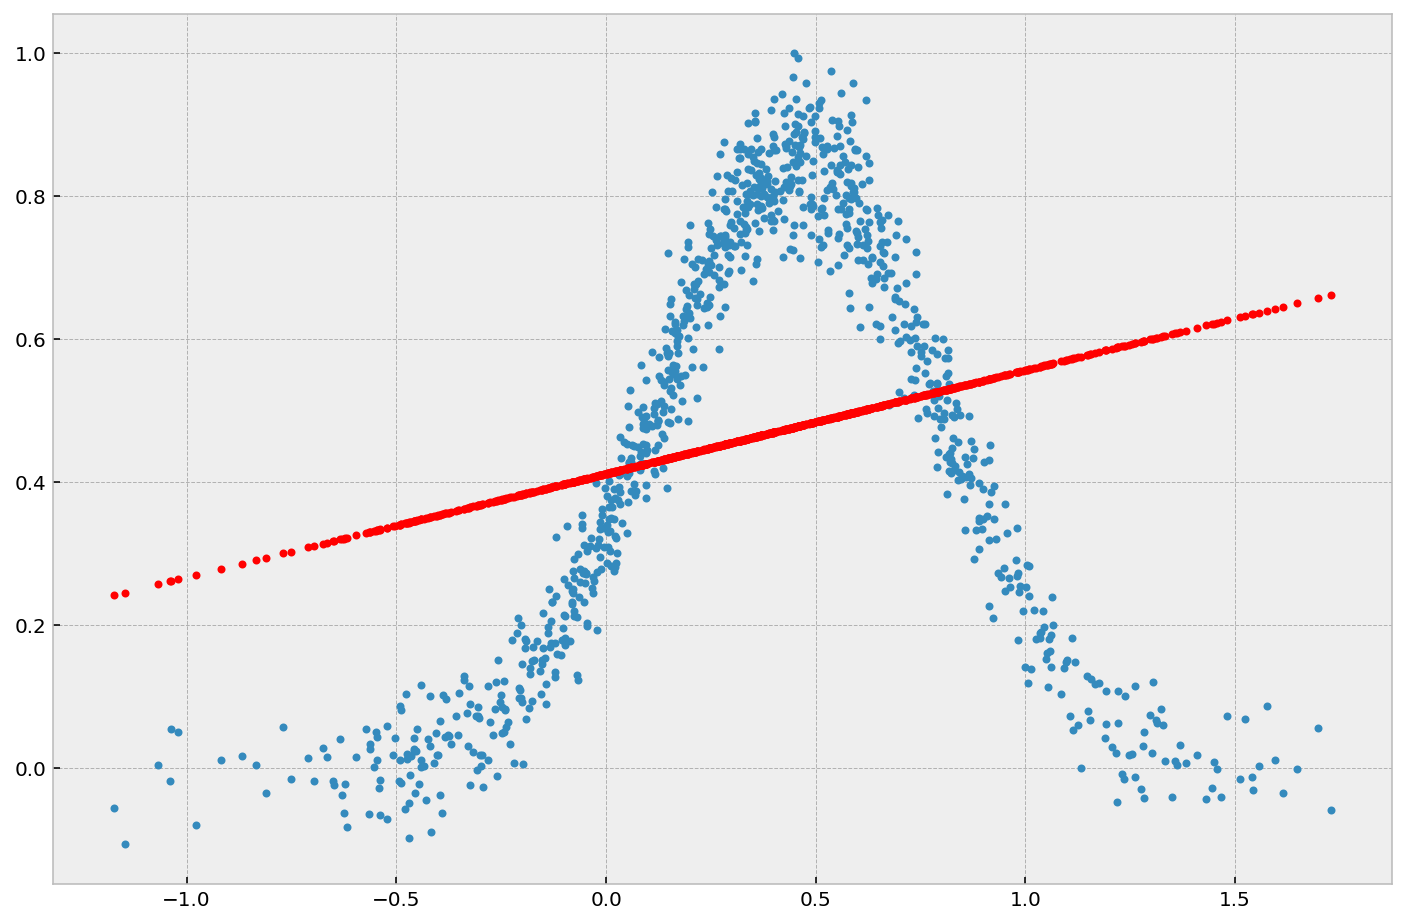

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(Xtrain, Ytrain)

Yguess = ridge.predict(Xtest)

plt.figure(figsize=(12, 8))
plt.plot(Xtest[:,0], Ytest, '.')
plt.plot(Xtest[:,0], Yguess, 'r.')
plt.show()

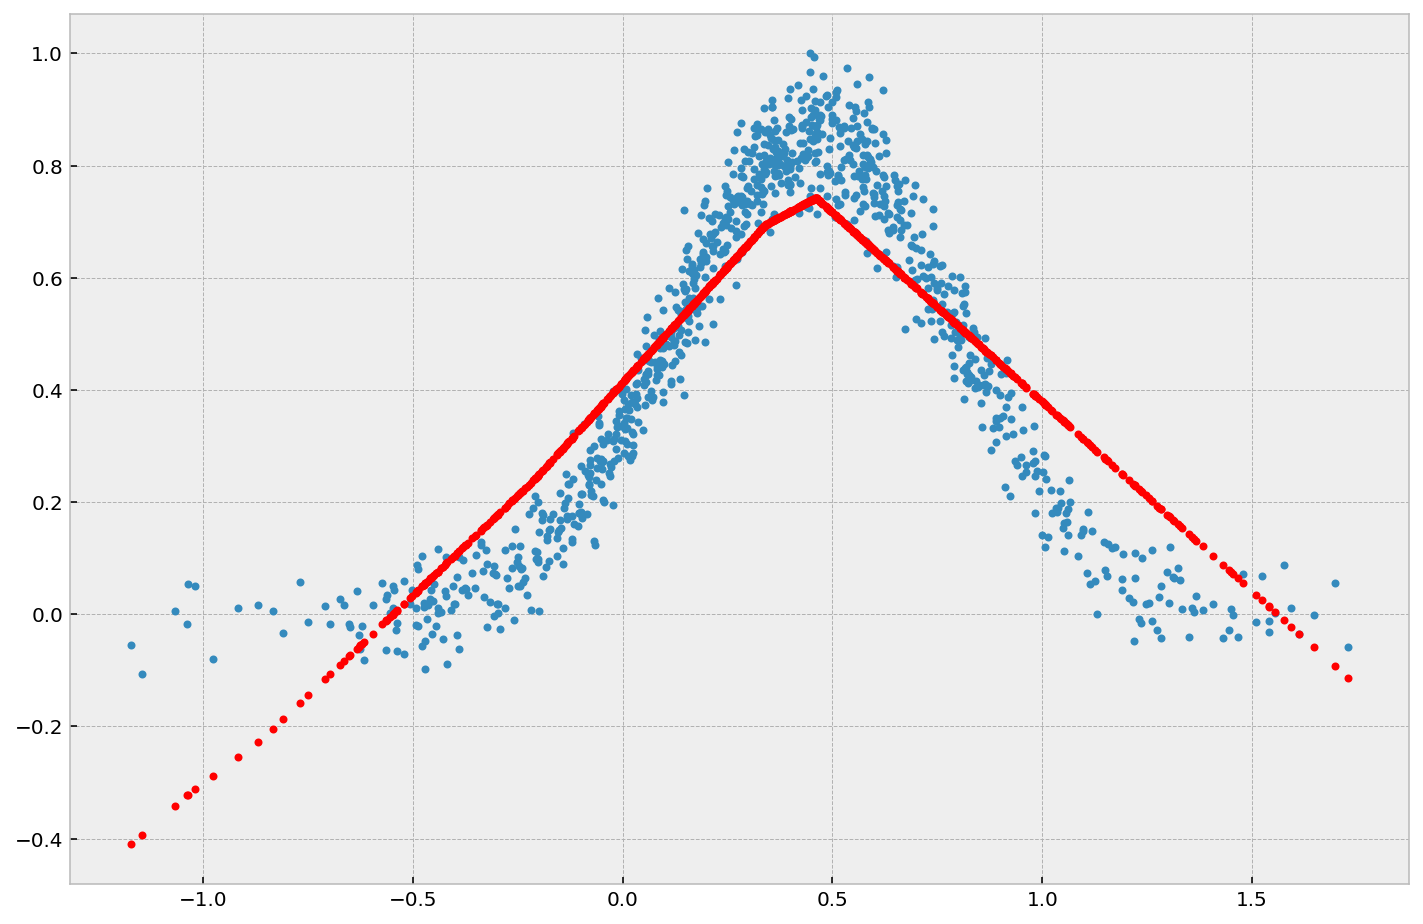

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=16)

mlp.fit(Xtrain, Ytrain)

Yguess = mlp.predict(Xtest)

plt.figure(figsize=(12, 8))
plt.plot(Xtest[:,0], Ytest, '.')
plt.plot(Xtest[:,0], Yguess, 'r.')
plt.show()

In [36]:
mean_squared_error(Ytest, Yguess), r2_score(Ytest, Yguess)

(0.0140001684315534, 0.8461189829350877)

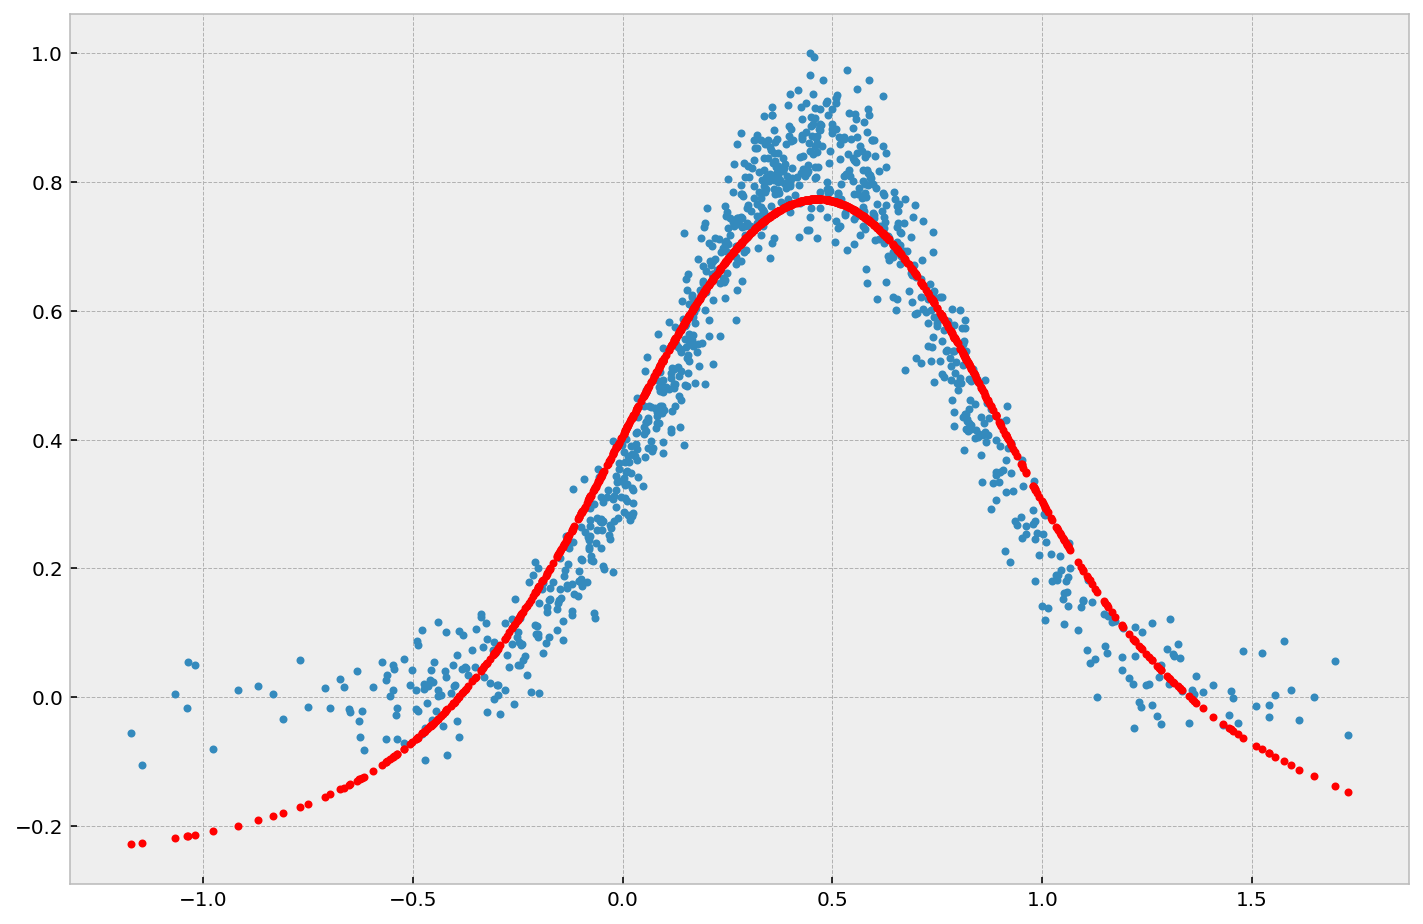

In [37]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(16,8))

mlp.fit(Xtrain, Ytrain)

Yguess = mlp.predict(Xtest)

plt.figure(figsize=(12, 8))
plt.plot(Xtest[:,0], Ytest, '.')
plt.plot(Xtest[:,0], Yguess, 'r.')
plt.show()

In [38]:
mean_squared_error(Ytest, Yguess), r2_score(Ytest, Yguess)

(0.0067607179879400426, 0.9256904539999289)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')

In [40]:
np.random.seed(0)
x = 10 * np.random.rand(100)

In [41]:
def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

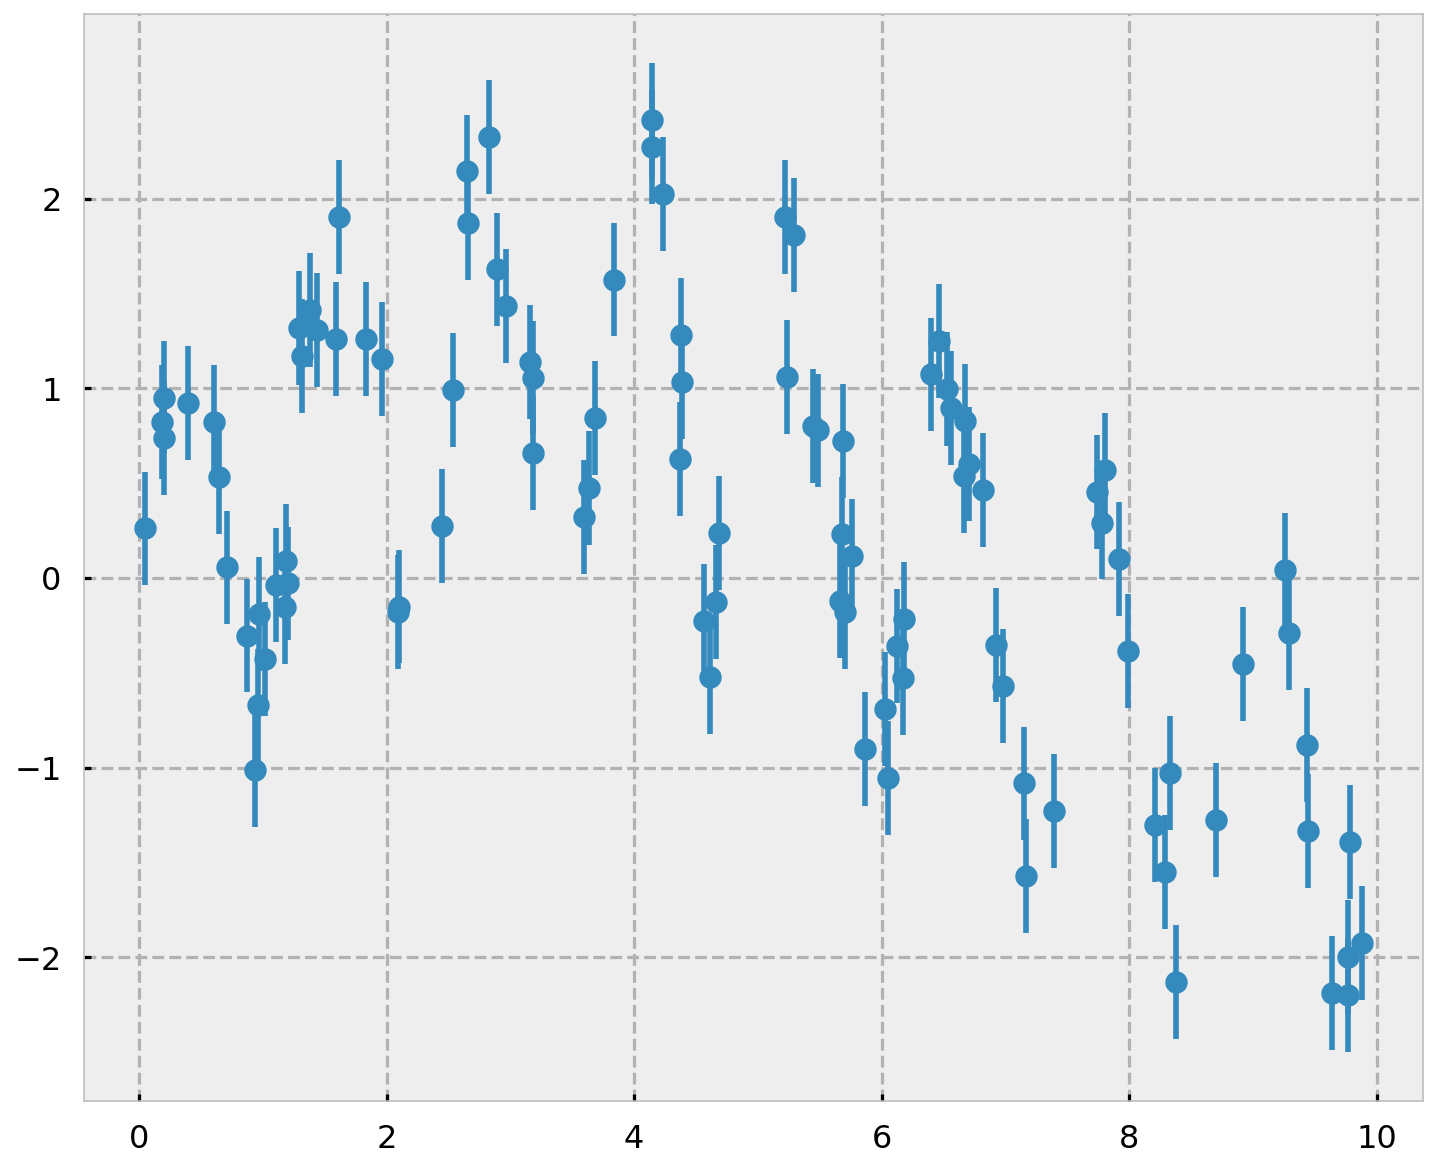

In [42]:
plt.figure(figsize = (12,10))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')
plt.show()

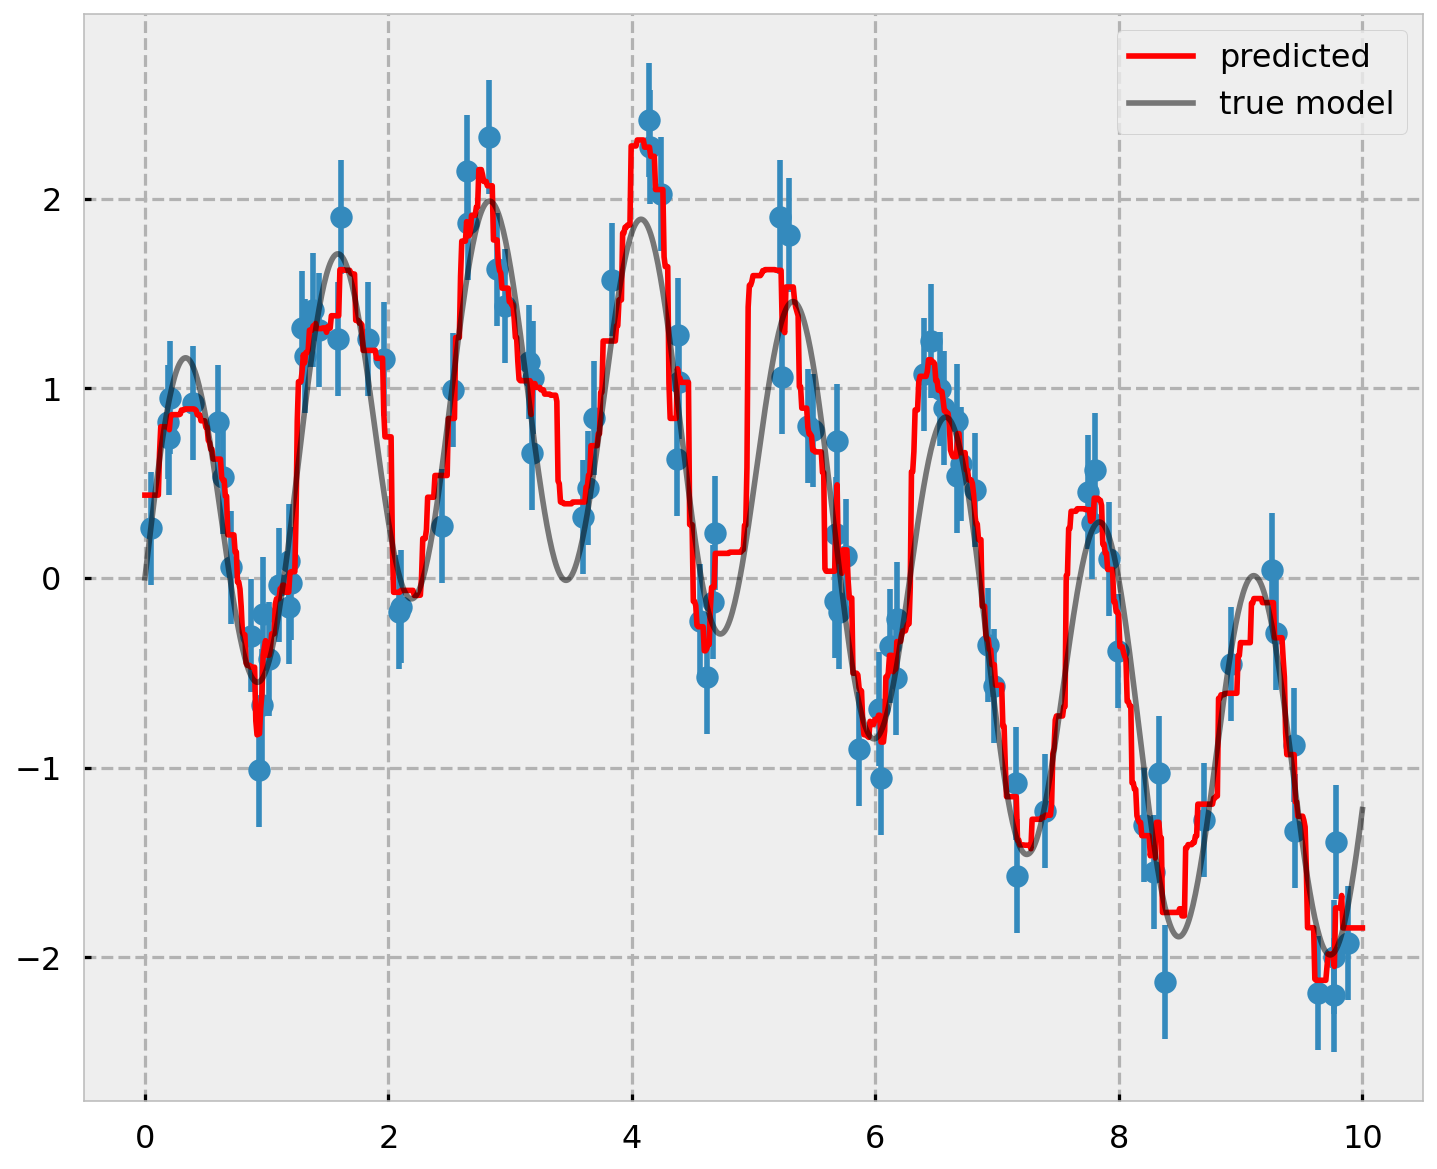

In [43]:
xfit = np.linspace(0, 10, 1000)

# fit the model and get the estimation for each data points
yfit = RandomForestRegressor(100, random_state=42).fit(x[:, None], y).predict(xfit[:, None])
ytrue = model(xfit, 0)

plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()
plt.show()

In [44]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.0869576380256092


In [45]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

C:\Users\melihcanyardi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


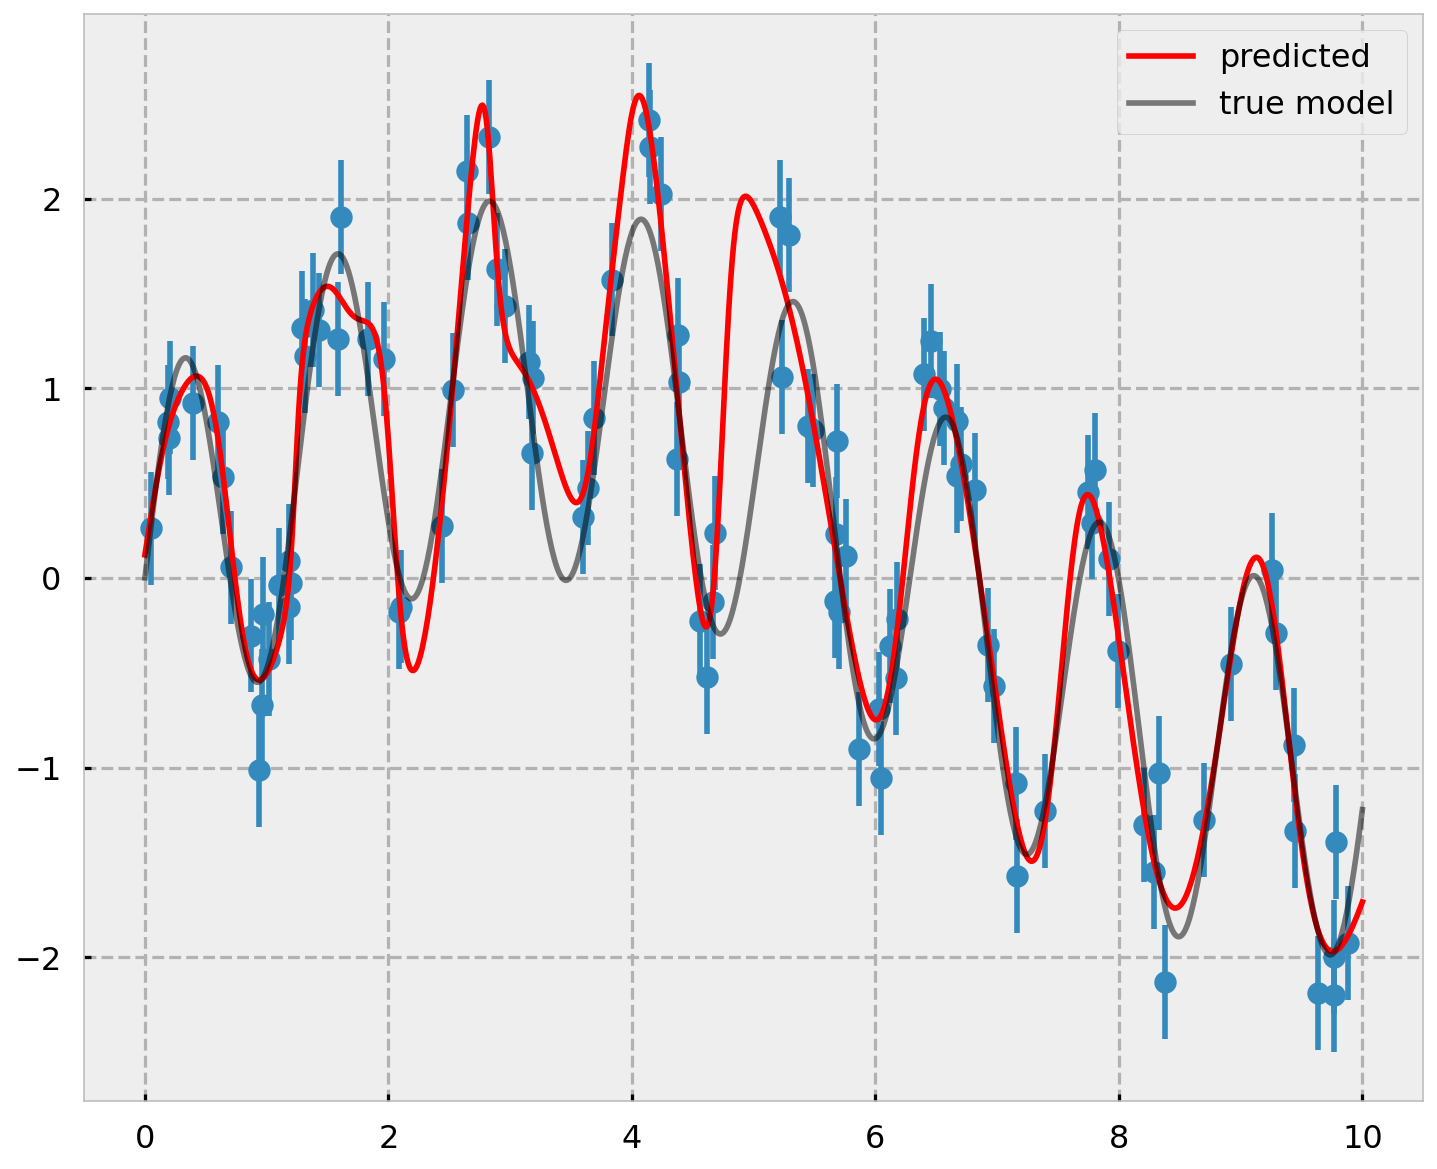

In [46]:
plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()
plt.show()

In [47]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.1588921158756478


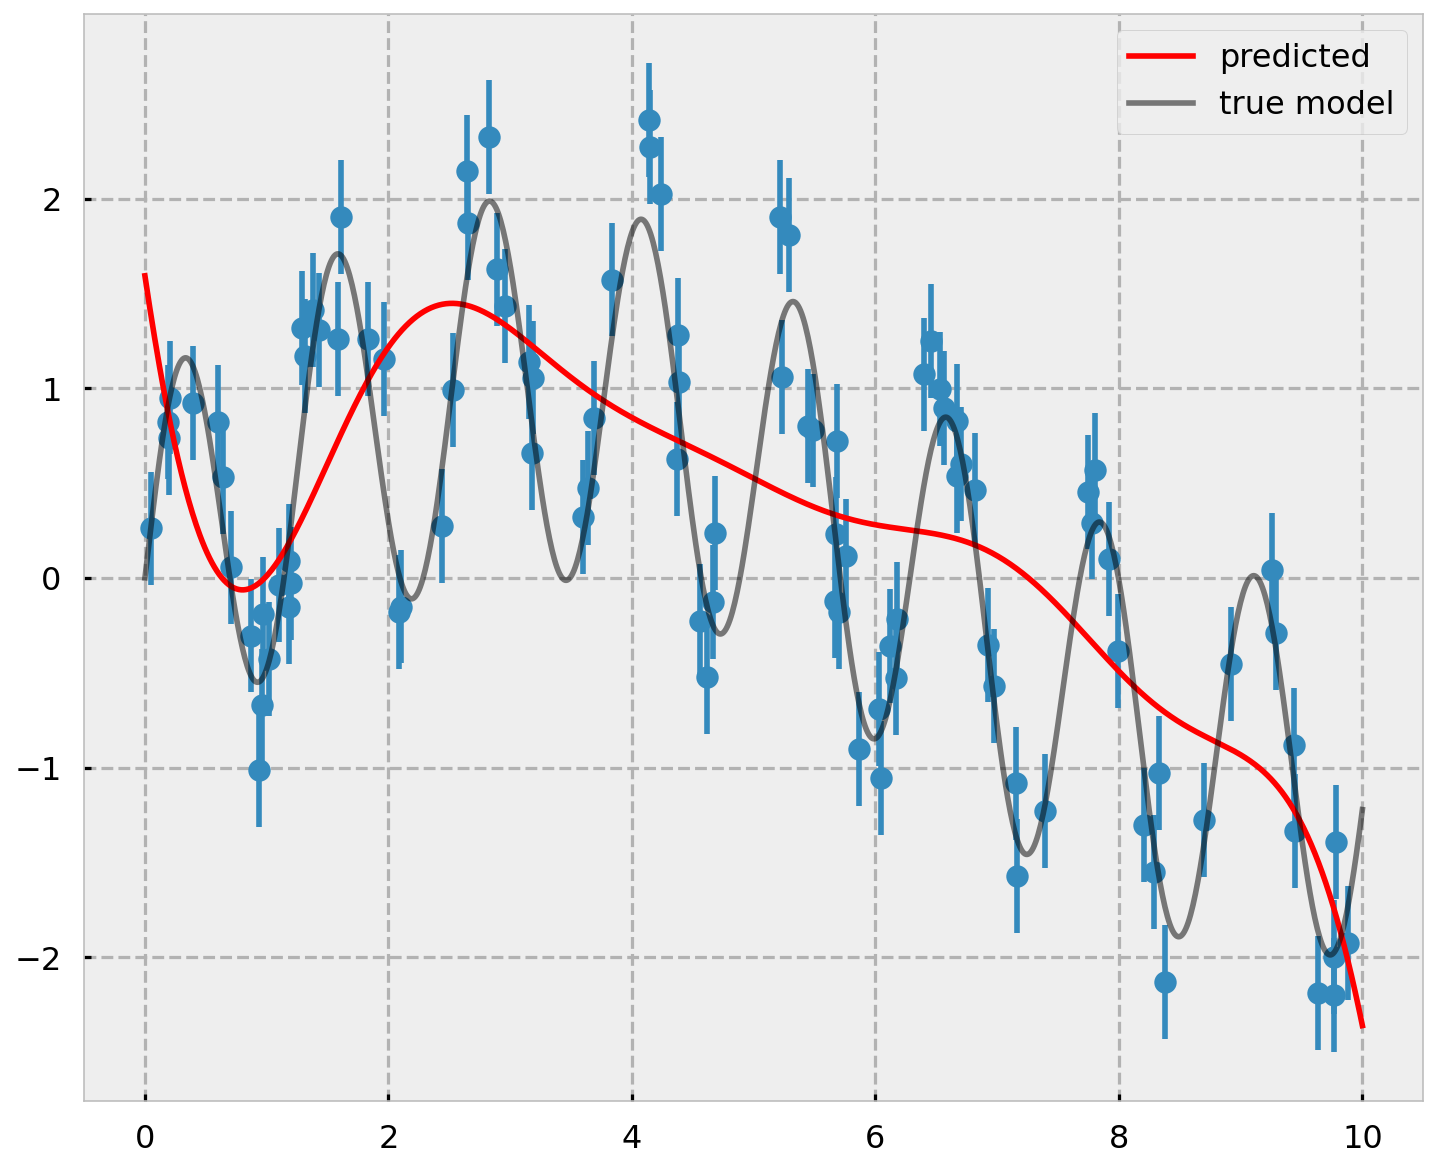

In [48]:
from sklearn.svm import SVR

# define your model
svr = SVR(C=1000)

# get the estimation from the model
yfit = svr.fit(x[:, None], y).predict(xfit[:, None])

# plot the results as above
plt.figure(figsize = (12,10))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, label = 'true model', zorder = 10)
plt.legend()
plt.show()

In [49]:
mse = mean_squared_error(ytrue, yfit)
print(mse)

0.5336973649791235


In [50]:
tt = pd.read_csv('immSurvey.csv')
tt.head()

,Unnamed: 0,ids,X.1,textToSend,Means,stanMeans,X,MetaID,treatment,pid_rep,...,RunAll,mergeIDs,stanMeansNewSys,stanSDsNewSys,coderMeans,newDocIDS,stanMeansNewSys2,stanSDsNewSys2,stanMeansNewSysPooled,stanSDsNewSysPooled
0,1,6606,1,problems caused by the influx of illegal immig...,0.750000,2.409768,1,0,1,1.00000,...,0.750291,240,1.919906,0.549770,1.5,10335,1.106977,0.320538,1.465566,0.288474
1,2,6607,2,"if you mean illegal immigration, i'm afraid of...",0.875000,3.710615,2,0,1,1.00000,...,1.011095,75,-0.138688,0.302764,1.0,10336,-0.223681,0.300575,-0.166691,0.219645
2,3,6608,3,that they should enter the same way my grandpa...,0.416667,-1.437706,3,0,0,0.33300,...,-0.219371,271,-0.334633,0.291336,0.0,10337,0.825119,0.317955,0.224096,0.220390
3,4,6609,4,legally entering the usa meeting the requireme...,0.458333,0.655503,4,0,0,0.50000,...,0.329845,181,0.386023,0.294324,1.5,10338,0.679629,0.305606,0.629995,0.221096
4,5,6610,5,terror bombings killing us robbing america,0.875000,5.337525,5,0,1,0.66667,...,1.955240,261,0.102707,0.274519,2.0,10339,1.206389,0.370577,0.574416,0.216228


In [51]:
alphas = tt.stanMeansNewSysPooled
sample = tt.textToSend

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<340x1475 sparse matrix of type '<class 'numpy.int64'>'
	with 6239 stored elements in Compressed Sparse Row format>

In [53]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,11,12,125,18,1b,600,95,able,abolition,aboration,...,wreckless,wrong,wrongly,xenophobia,years,yet,you,young,your,yrars
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,2,0,0,0,0,0
338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#down-weighting frequent words; term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,11,12,125,18,1b,600,95,able,abolition,aboration,...,wreckless,wrong,wrongly,xenophobia,years,yet,you,young,your,yrars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.253915,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.195271,0.000000,0.0,0.000000,0.0,0.0,0.0
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.078393,0.0,0.000000,0.150361,0.0,0.000000,0.0,0.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0


In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, alphas,
random_state=1)

In [56]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(100,50))

mlp.fit(Xtrain, ytrain)

yguess = mlp.predict(Xtest)

np.corrcoef(ytest, yguess)

array([[1.        , 0.69249119],
       [0.69249119, 1.        ]])

In [57]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(1000,500))

mlp.fit(Xtrain, ytrain)

yguess = mlp.predict(Xtest)

np.corrcoef(ytest, yguess)

array([[1.        , 0.69722194],
       [0.69722194, 1.        ]])

In [58]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(50,25))

mlp.fit(Xtrain, ytrain)

yguess = mlp.predict(Xtest)

np.corrcoef(ytest, yguess)

array([[1.        , 0.71879218],
       [0.71879218, 1.        ]])

In [59]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(20,10))

mlp.fit(Xtrain, ytrain)

yguess = mlp.predict(Xtest)

np.corrcoef(ytest, yguess)

array([[1.        , 0.71625616],
       [0.71625616, 1.        ]])

In [60]:
mlp = MLPRegressor(random_state=0, activation='tanh', hidden_layer_sizes=(10,5))

mlp.fit(Xtrain, ytrain)

yguess = mlp.predict(Xtest)

np.corrcoef(ytest, yguess)

array([[1.        , 0.68719389],
       [0.68719389, 1.        ]])

#### TODO: play around with number of layers, layer sizes, different activations, etc. see if you can do better